# Modeling the MOXSI PSF

In [1]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import LogStretch, ImageNormalize
from astropy.stats import gaussian_fwhm_to_sigma
from scipy.ndimage import gaussian_filter

import mocksipipeline.instrument.configuration
from mocksipipeline.modeling import convolve_with_response
from mocksipipeline.util import read_data_cube
from mocksipipeline.instrument.configuration import moxsi_slot

In [7]:
spec_cube = read_data_cube(
    '/Users/wtbarnes/Documents/codes/mocksipipeline/pipeline/results/2022-03-30T17:55_sun_coronal_1992_feldman_ext_all/spectral_cube.fits'
)

In [23]:
instr_cube = convolve_with_response(spec_cube, moxsi_slot.channel_list[9], electrons=False, include_gain=False)

/Users/wtbarnes/mambaforge/envs/mocksipipeline-dev/lib/python3.11/site-packages/astropy/units/equivalencies.py:141: RuntimeWarning: divide by zero encountered in divide
  (si.m, si.J, lambda x: hc / x),
/Users/wtbarnes/mambaforge/envs/mocksipipeline-dev/lib/python3.11/site-packages/xrt/backends/raycing/materials.py:253: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  ef1f2 = (np.array(res[self.name+'_E']),
/Users/wtbarnes/mambaforge/envs/mocksipipeline-dev/lib/python3.11/site-packages/xrt/backends/raycing/materials.py:254: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  np.array(res[self.name+'_f1']),
/Users/wtbarnes/mambaforge/envs/mocksipipeline-dev/lib/python3.11/site-packages/xrt/backends/raycing/materials.py:255: UserWarning: Readi

In [24]:
instr_cube

NDCube
------
Dimensions: [2331.  338.  338.] pix
Physical Types of Axes: [('em.wl',), ('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat'), ('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat')]
Unit: ph / (pix s)
Data Type: float64

<WCSAxes: >

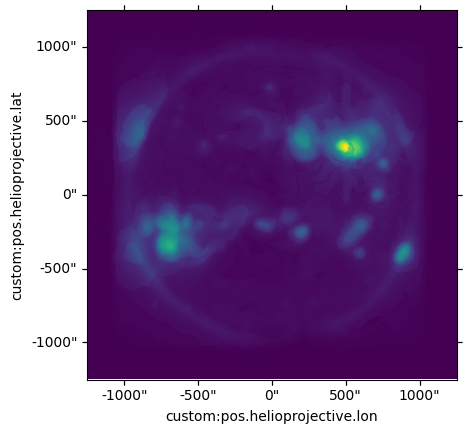

In [25]:
instr_cube[500].plot(norm=ImageNormalize(stretch=LogStretch()))

In [26]:
psf_width = ([40,40]*u.arcsec) * gaussian_fwhm_to_sigma / moxsi_slot.optical_design.spatial_plate_scale * [10,1]

In [27]:
psf_width

<Quantity [22.94107187,  2.29410719] pix>

In [28]:
_ = gaussian_filter(instr_cube.data, psf_width.value[::-1], axes=(1,2), output=instr_cube.data)

<WCSAxes: >

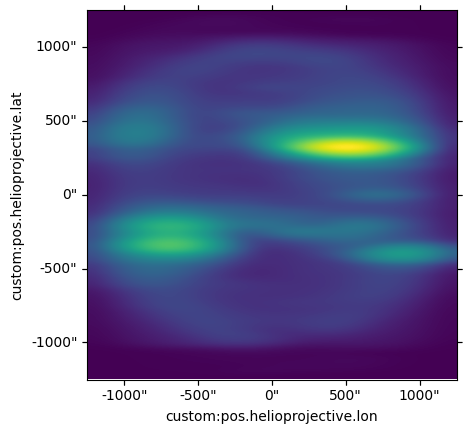

In [29]:
instr_cube[500].plot(norm=ImageNormalize(stretch=LogStretch()))

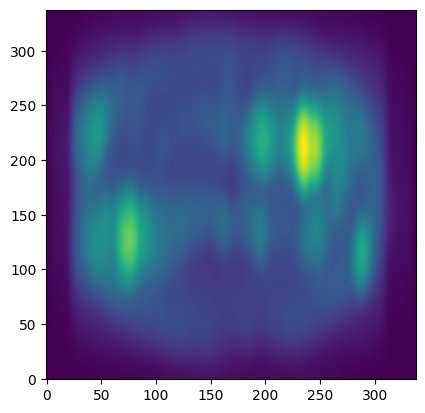

In [53]:
plt.imshow(instr_cube_blurred.sum(axis=0), norm=ImageNormalize(stretch=LogStretch()), origin='lower')

In [40]:
import sunpy.map
m = sunpy.map.Map(
    '/Users/wtbarnes/Documents/codes/mocksipipeline/pipeline/results/2022-03-30T17:55_sun_coronal_1992_feldman_ext_all/level_1/aia_131.fits'
)

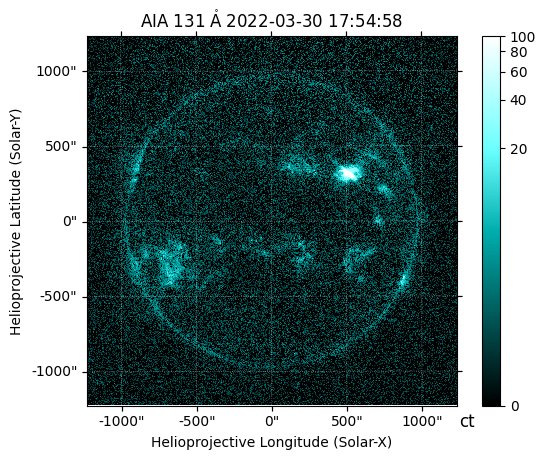

In [46]:
m.peek(vmax=1e2, vmin=0)

In [2]:
from mocksipipeline.instrument.design import InstrumentDesign

In [3]:
instr_conf = getattr(mocksipipeline.instrument.configuration, 'moxsi_slot')

In [6]:
moxsi_slot.optical_design.spatial_plate_scale

<Quantity [7.40437766, 7.40437766] arcsec / pix>

In [32]:
moxsi_slot.channel_list[0].spatial_plate_scale

<Quantity [7.40437766, 7.40437766] arcsec / pix>

In [78]:
for c in instr_conf.channel_list:
    print(f'{c.name}_{c.spectral_order}')

filtergram_1_0
filtergram_2_0
filtergram_3_0
filtergram_4_0
spectrogram_pinhole_-4
spectrogram_pinhole_-3
spectrogram_pinhole_-2
spectrogram_pinhole_-1
spectrogram_pinhole_0
spectrogram_pinhole_1
spectrogram_pinhole_2
spectrogram_pinhole_3
spectrogram_pinhole_4
spectrogram_slot_-4
spectrogram_slot_-3
spectrogram_slot_-2
spectrogram_slot_-1
spectrogram_slot_0
spectrogram_slot_1
spectrogram_slot_2
spectrogram_slot_3
spectrogram_slot_4


In [33]:
from mocksipipeline.instrument.optics.aperture import CircularAperture

In [34]:
pinhole = CircularAperture(44*u.micron)

In [35]:
pinhole.psf_fwhm = (40,40)*u.arcsec

In [38]:
(moxsi_slot.channel_list[-1].aperture.center_to_center_distance / moxsi_slot.channel_list[-1].aperture.diameter).decompose()

<Quantity 7.06858347>

In [40]:
import sunpy.map
foo = sunpy.map.Map('/Users/wtbarnes/Documents/codes/mocksipipeline/pipeline/results/second_overlappogram_test_1/level_2/aia_171.fits')

Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2022-03-30 17:55:00
Exposure Time,2.000158 s
Dimension,[325. 325.] pix
Coordinate System,helioprojective
Scale,[7.40437766 7.40437766] arcsec / pix
Reference Pixel,[162. 162.] pix

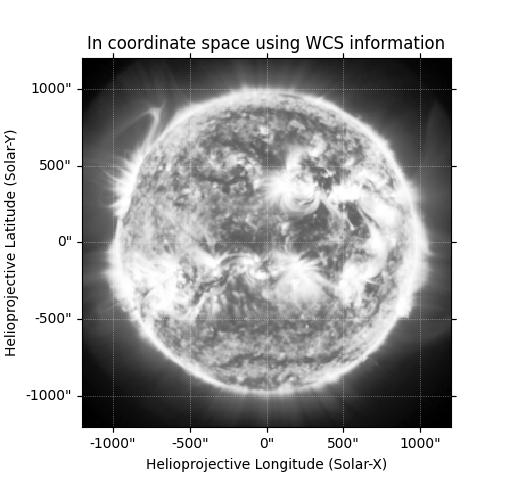
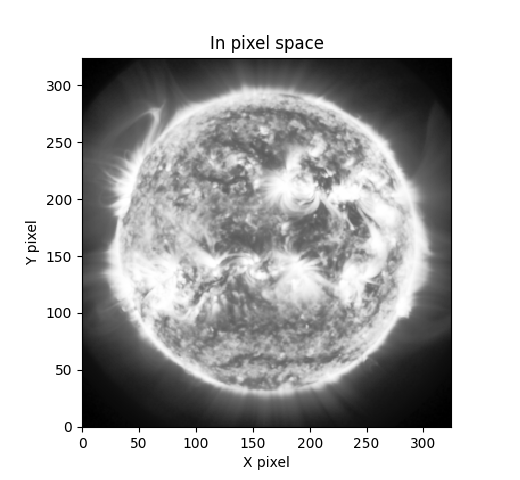
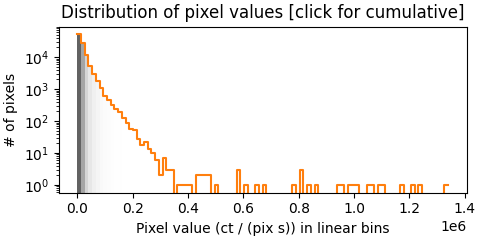
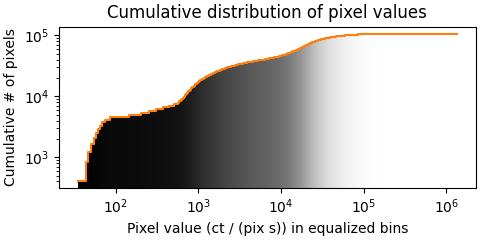

In [41]:
foo

In [42]:
from overlappy.io import read_overlappogram

In [43]:
full_overlap_slot = read_overlappogram('/Users/wtbarnes/Documents/codes/mocksipipeline/pipeline/results/second_overlappogram_test_1/detector_images/all_components.fits')

<WCSAxes: >

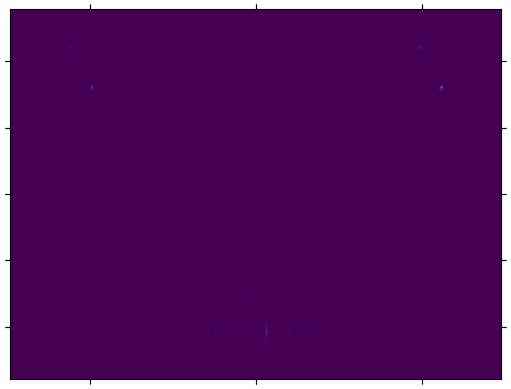

In [46]:
full_overlap_slot[0].plot()